In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

I.General Tasks: Framing questions

 QUESTIONS: 
 1.What is the distribution of age across the dataset?
 2.How does the incidence of stroke vary with age?
 3.Are there any correlations between BMI and stroke?
 4.Is there a difference in stroke incidence between genders?
 5.How do different work types correlate with stroke incidence?


Graph- Distrubution of age

C:\Users\rames\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


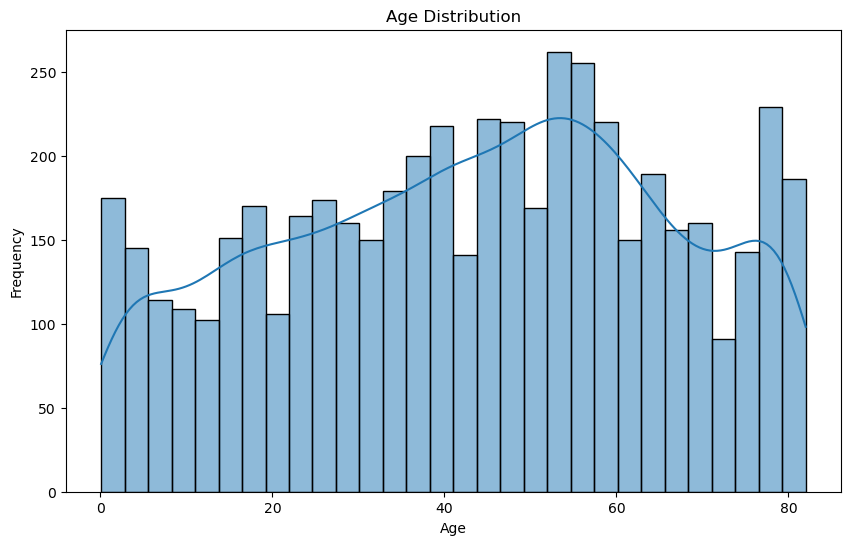

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Stroke incidence by age group

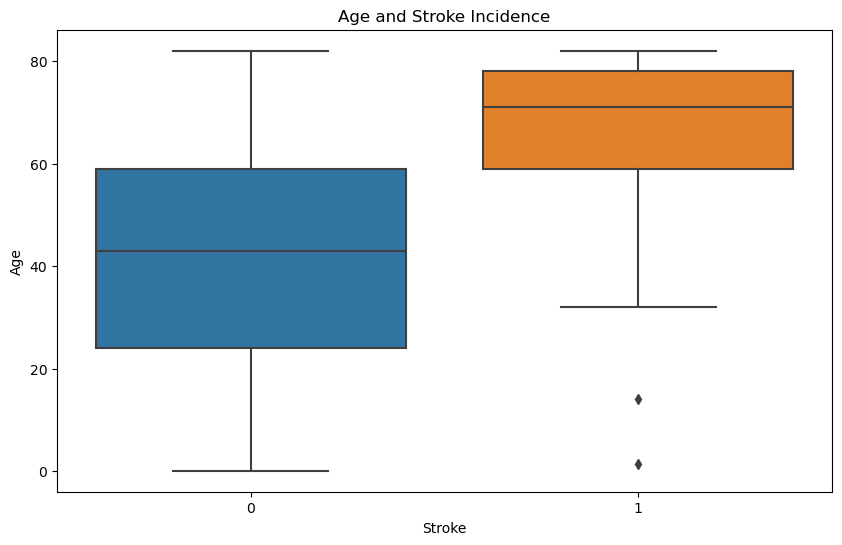

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Age and Stroke Incidence')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

BMI vs Stroke Incidence

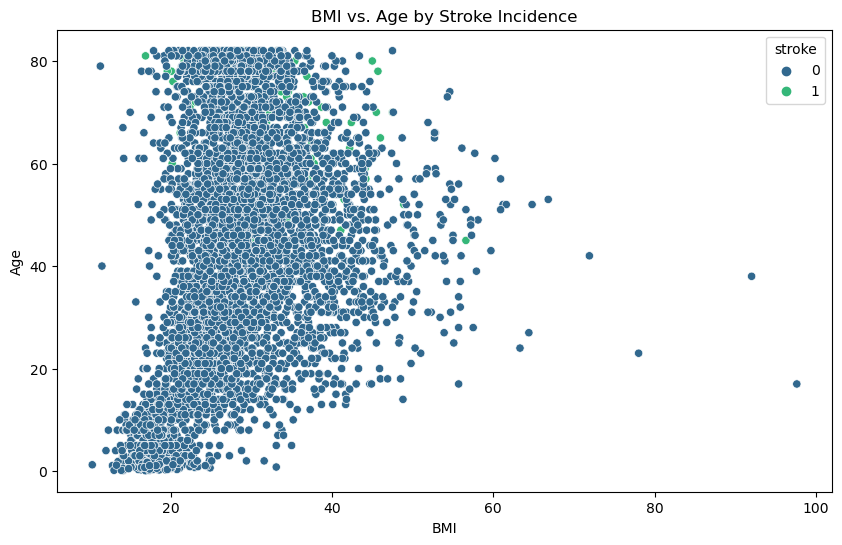

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='age', hue='stroke', data=data, palette="viridis")
plt.title('BMI vs. Age by Stroke Incidence')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

Stroke Incidence by gender

In [30]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

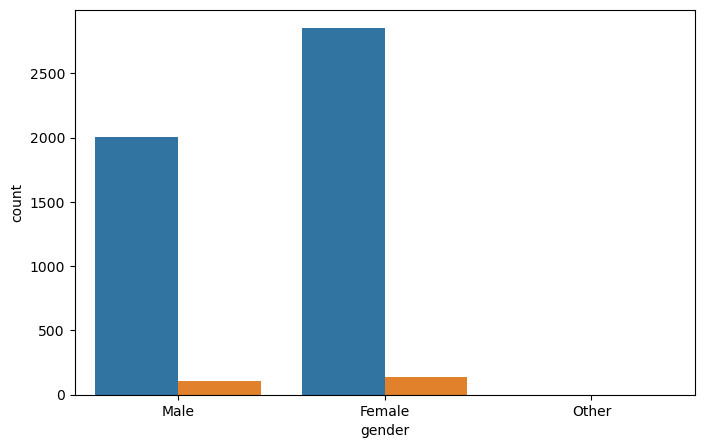

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Stroke Incidence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [32]:
data['stroke'] = data['stroke'].astype('category')
data['work_type'] = data['work_type'].astype('category')

C:\Users\rames\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

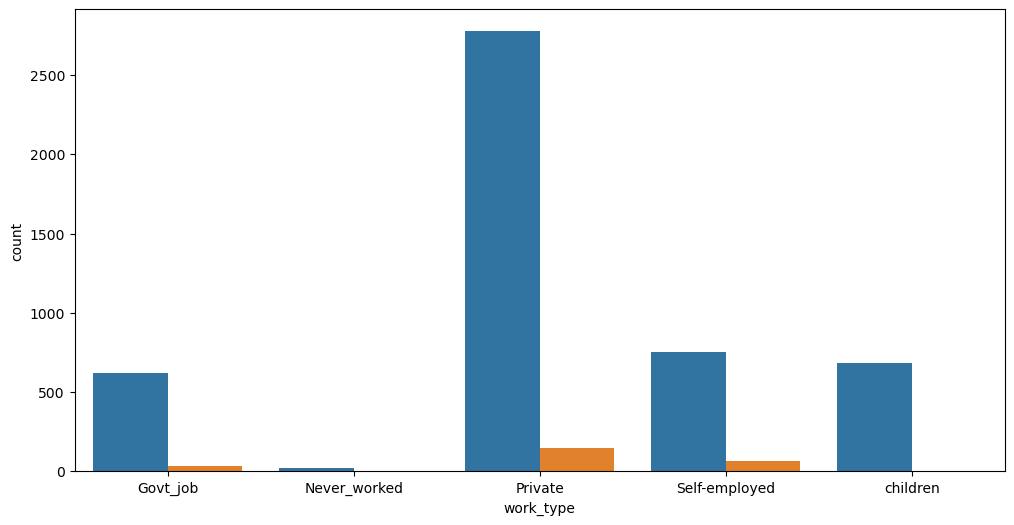

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='work_type', hue='stroke', data=data)
plt.title('Stroke Incidence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

Stroke Incidence by work Type

C:\Users\rames\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

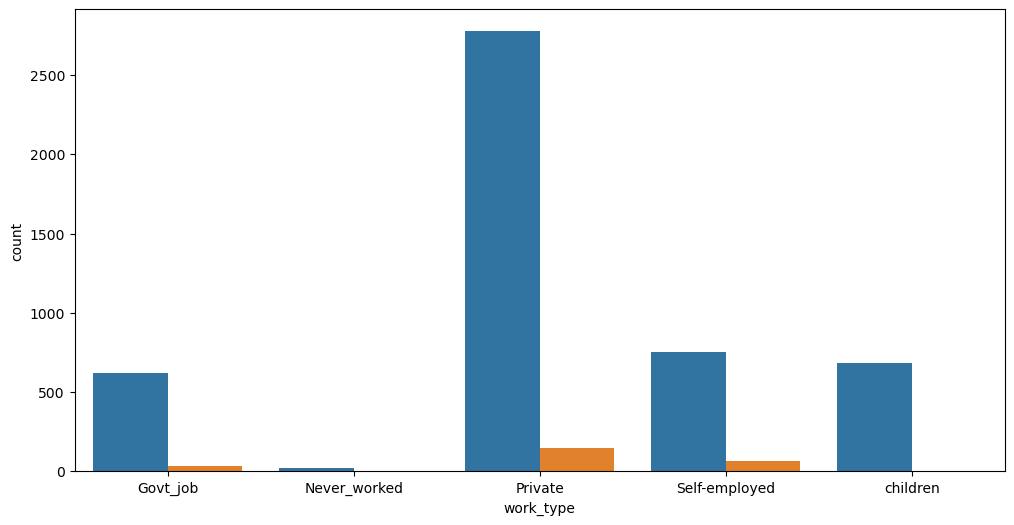

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='work_type', hue='stroke', data=data)
plt.title('Stroke Incidence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

Observation:
1.Age distribution shows that most participants fall into specific age groups.
2. Higher age appears correlated with higher stroke incidence, as seen in the age and stroke boxplot.
3. Scatterplot indicates variation in BMI across ages, with stroke incidence increasing for certain BMI levels.
4. Gender and stroke count show a slightly higher rate of stroke among certain genders.
5. Work type may have an impact on stroke incidence, with certain work types showing higher rates of stroke.


Specific Task -Data Encoding

Converting Residence_type to binary Rural/urban column

In [42]:
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})
data['Residence_type'].head()

0    1
1    0
2    0
3    1
4    0
Name: Residence_type, dtype: int64

Convert work_type column to seperate binary columns

In [48]:
work_dummies = pd.get_dummies(data['work_type'], prefix='work_type')
data = pd.concat([data, work_dummies[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']]], axis=1)
data[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']].head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True


Convert smoking_status column to seperate binary columns

In [52]:
smoking_dummies = pd.get_dummies(data['smoking_status'], prefix='smoking_status')
data = pd.concat([data, smoking_dummies], axis=1)
data[smoking_dummies.columns].head()

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False


Ensure all encoded columns only have values 0 to 1

In [55]:
data[['Residence_type']] = data[['Residence_type']].astype(int)
data[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']] = data[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']].astype(int)
data[[col for col in smoking_dummies.columns]] = data[[col for col in smoking_dummies.columns]].astype(int)

create a new dataset for the data model

In [62]:
data_model = data.drop(columns=['Residence_type', 'work_type', 'smoking_status'])
print(data_model.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

   avg_glucose_level   bmi stroke  work_type_Never_worked  work_type_Private  \
0             228.69  36.6      1                       0                  1   
1             202.21   NaN      1                       0                  0   
2             105.92  32.5      1                       0                  1   
3             171.23  34.4      1                       0                  1   
4             174.12  24.0      1                       0                  0   

   work_type_Self-employed  smoking_status_Unknown  \
0                        0                       0   
1 